Image Segmentation

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import time

%matplotlib inline

In [148]:
cd '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/'

/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures


In [149]:
buildinggrayscale ='/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/building-grayscale.jpg'
cameramangrayscale = '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/cameraman-grayscale.jpg'
mandrillgrayscale = '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/mandrill-grayscale.jpg'

##PART 1: Image Thresholding

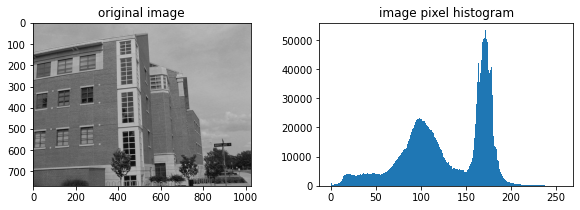

In [150]:
img = mpimg.imread(buildinggrayscale)

f = plt.figure(figsize=(10,3))
ax_1 = f.add_subplot(121)
ax_2 = f.add_subplot(122)
ax_1.set_title('original image')
ax_2.set_title('image pixel histogram')

ax_1.imshow(img), ax_2.hist(img.ravel(),bins = 256, range = [0,256])
f.show()

In [151]:
img.shape

(768, 1024, 3)

""write a function that takes as input a (grayscale) image and a threshold, t, and returns a new image that is a thresholded version of the input image.
That is, the output image should consist only of pixels with intensity 0 or 255: 0 where the original image was less than the threshold, 255 where it was greater.""

In [152]:
def simple_threshold(image_path, threshold):
  image = Image.open(image_path)
  image_pixels = image.load()
  width, height = image.size
  for i in range(width):
    for j in range(height):
      pixel = image.getpixel((i, j))
      if (max(pixel) < threshold):
        image_pixels[i,j] = (0,0,0)
      else:
        image_pixels[i,j] = (255,255,255)

  return image

In [153]:
def binary_threshold(image_path, threshold):
  image = Image.open(image_path)
  width, height = image.size
  image_pixels = np.zeros((height, width))
  for i in range(width):
    for j in range(height):
      pixel = image.getpixel((i, j))
      if (max(pixel) >= threshold):
        image_pixels[j, i] = 1

  f = plt.figure(figsize=(10,3))
  ax_1 = f.add_subplot(121)
  ax_2 = f.add_subplot(122)
  ax_1.set_title('original image')
  ax_2.set_title('threshold image at ' +str(threshold) )

  ax_1.imshow(image), ax_2.imshow(image_pixels, cmap='gray')
  f.show()

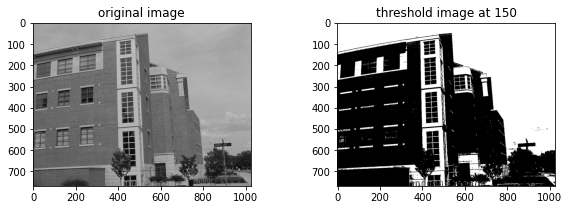

In [155]:
binary_threshold(buildinggrayscale,150)

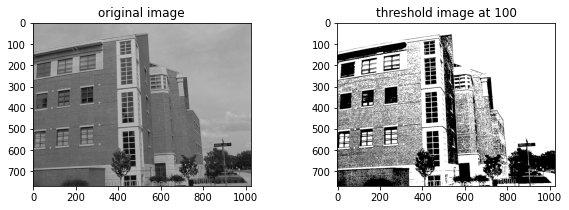

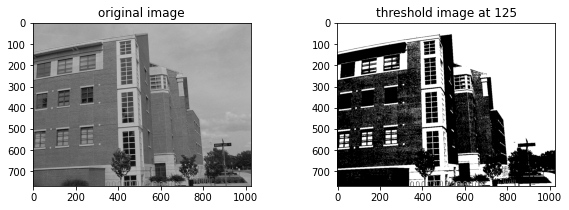

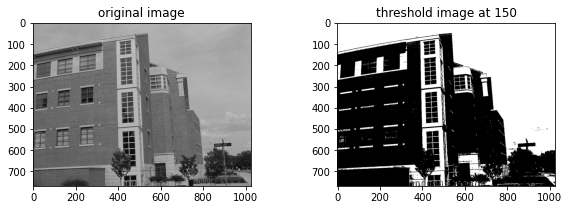

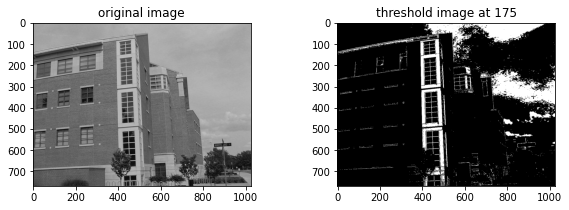

In [156]:
for i in range(100,200,25):
    binary_threshold(buildinggrayscale,i)

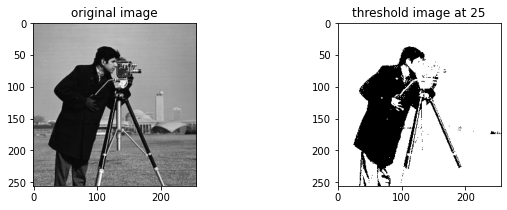

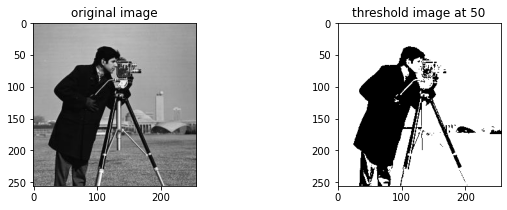

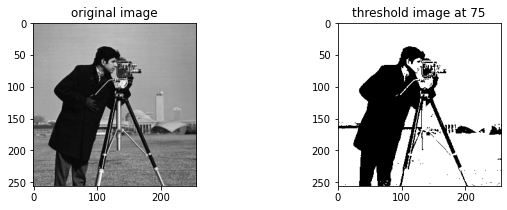

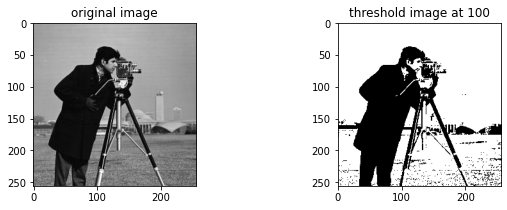

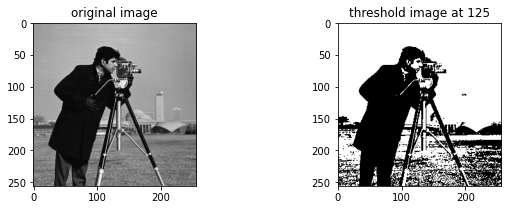

In [157]:
for i in range(25,150,25):
    binary_threshold(cameramangrayscale,i)

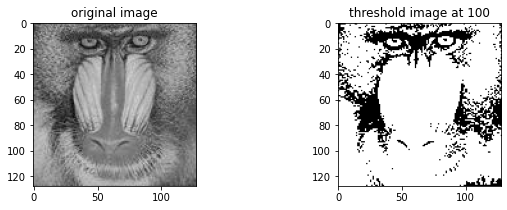

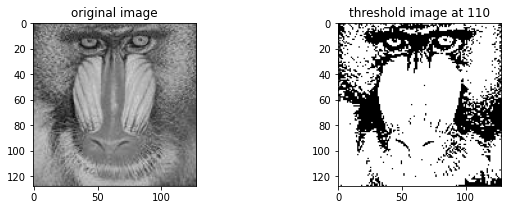

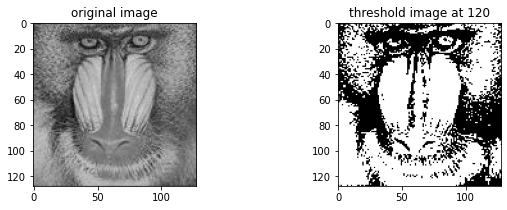

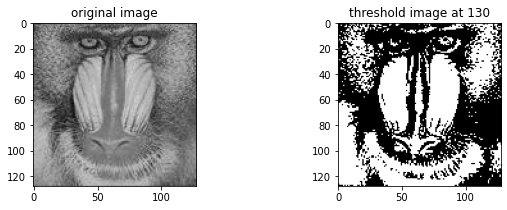

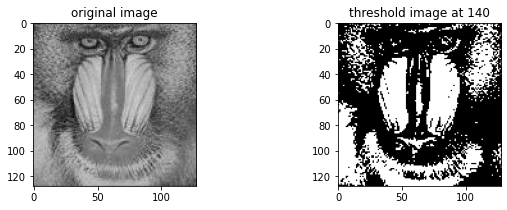

In [158]:
for i in range(100,145,10):
  binary_threshold(mandrillgrayscale, i)

In [159]:
def threshold(image_path):
  image = Image.open(image_path)
  width, height = image.size
  image_pixels = np.zeros((height, width))
  values = np.array(image)
  
  f = plt.figure(figsize=(10,3))
  ax_1 = f.add_subplot(121)
  ax_2 = f.add_subplot(122)
  ax_1.set_title('original image')
  ax_2.set_title('image pixel histogram')

  ax_1.imshow(image), ax_2.hist(values.ravel(),bins = 256, range = [0,256])
  plt.show()

  time.sleep(1)

  t = int(input('Enter selected threshold value: '))

  for i in range(width):
    for j in range(height):
      pixel = image.getpixel((i, j))
      if (max(pixel) >= t):
        image_pixels[j, i] = 1

  return plt.imshow(image_pixels, cmap=plt.cm.gray)

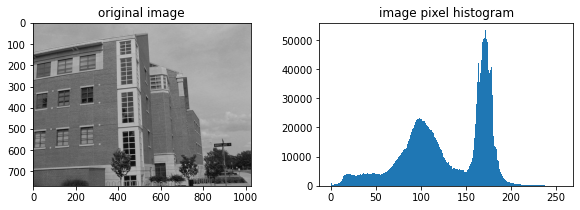

Enter selected threshold value: 148


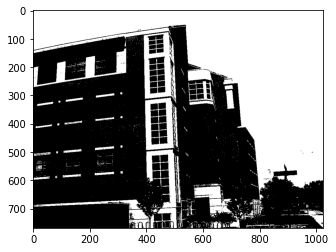

In [160]:
threshold(buildinggrayscale)

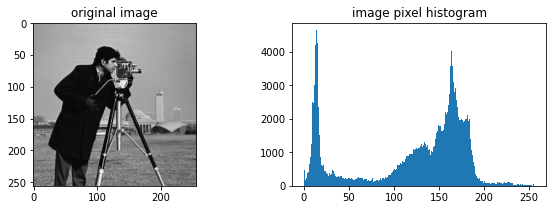

Enter selected threshold value: 75


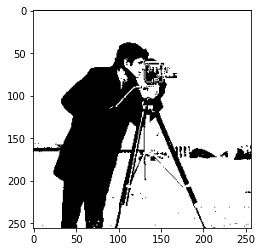

In [161]:
output = threshold(cameramangrayscale)
output

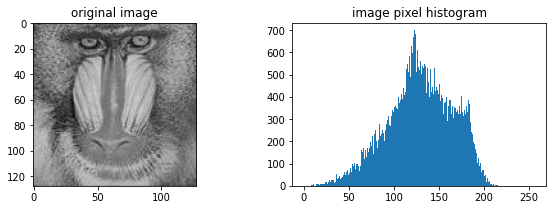

Enter selected threshold value: 135


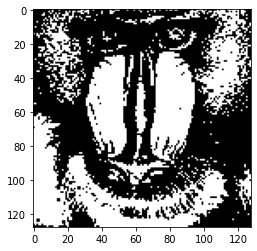

In [162]:
output = threshold(mandrillgrayscale)
output

""Write a function to perform k-means clustering with the following prototype:
function [means,member] = kmeans(x,k);""

Thresholding Using K-Means

In [163]:
mandrill = '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/mandrill.jpg'
building ='/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/building.jpg'
campus = '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/campus.jpg'
mountain = '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/mountain.jpg'
fruit = '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/fruit.jpg'
castle = '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/castle.jpg'
clown = '/content/drive/MyDrive/2022SP-CMP_SC-8690-01/assignment1-pictures/clown.jpg'


In [164]:
import numpy as np
from scipy.spatial.distance import cdist #for calulating distances
from sklearn.decomposition import PCA #for reducing channels from 3 (RGB) to 2 dimensions

In [165]:
image = Image.open(clown)
image_pixels = image.load()
width, height = image.size
values = np.array(image)

In [ ]:
image

In [167]:
values.shape

(451, 296, 3)

In [168]:
values.shape[0]*values.shape[1]

133496

In [169]:
pixel_values = values.reshape((-1, 3))

In [171]:
pixel_values.shape

(133496, 3)

In [172]:
pca = PCA(2)
df = pca.fit_transform(pixel_values)

In [173]:
df, df.shape, len(df)

(array([[-132.71014398,  -43.02065853],
        [ -76.25738621,  -53.87500821],
        [ -70.0710558 ,  -55.43942939],
        ...,
        [-102.92203625,    0.32514954],
        [-110.19304668,    2.79330211],
        [-125.06278133,    4.00468098]]), (133496, 2), 133496)

In [174]:
#Defining our function 
def k_means(x,k):
    idx = np.random.choice(len(x), k, replace=False)
    centers = x[idx, :]
    dists = cdist(x, centers ,'euclidean')
    points = np.array([np.argmin(i) for i in dists])
       
    i = 1
    while i < 100: #run for 99 extra iterations
        centers = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centers.append(temp_cent)
            i += 1
 
        centers = np.vstack(centers)
         
        dists = cdist(x, centers ,'euclidean')
        points = np.array([np.argmin(i) for i in dists])
         
    return points, centers

In [177]:
#Applying our function
member, means = k_means(df,5) #takes about a minute

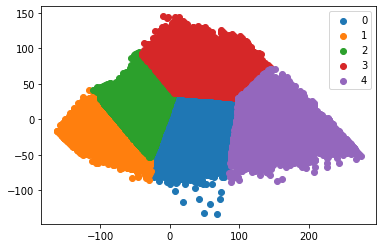

In [178]:
labels = np.unique(member)
for i in labels:
    plt.scatter(df[member == i , 0] , df[member == i , 1] , label = i)
plt.legend()
plt.show()

In [179]:
member.reshape((height, width)).shape

(451, 296)

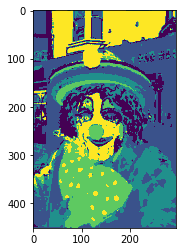

In [181]:
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis', 5)
plt.imshow(member.reshape((height, width)), cmap=cmap)
plt.show()

In [182]:
images = [mandrill,building,campus,mountain,fruit,castle,clown]

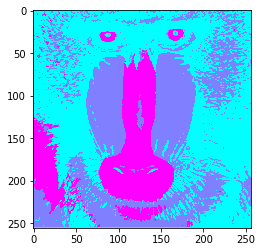

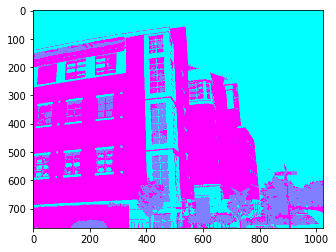

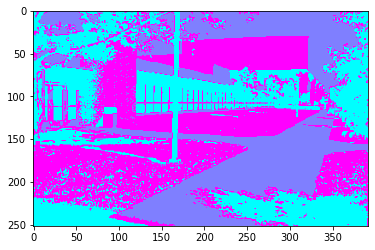

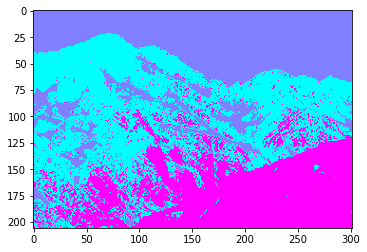

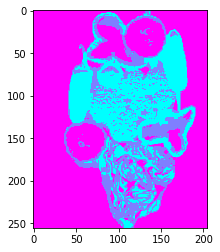

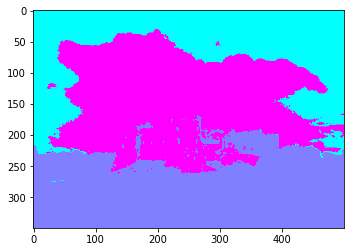

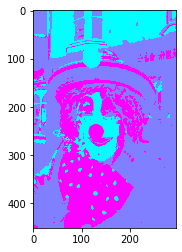

In [183]:
for i in images:
  image = Image.open(i)
  image_pixels = image.load()
  width, height = image.size
  values = np.array(image)
  pixel_values = values.reshape((-1, 3))
  pca = PCA(2)
  df = pca.fit_transform(pixel_values)
  member, means = k_means(df,3)
  cmap = matplotlib.cm.get_cmap('cool', 3)
  plt.imshow(member.reshape((height, width)), cmap=cmap)
  plt.show()

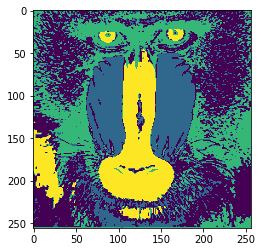

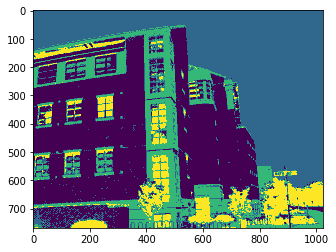

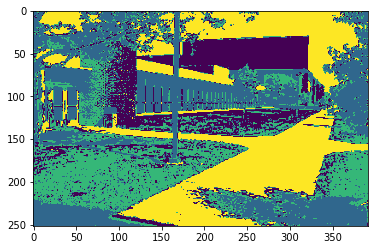

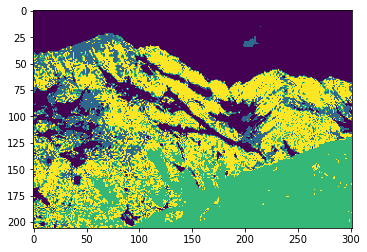

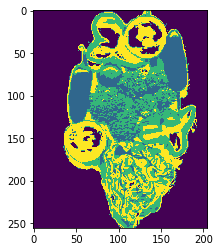

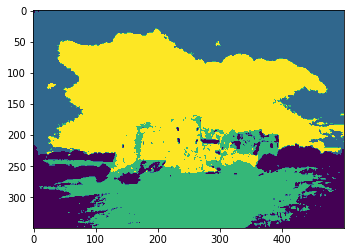

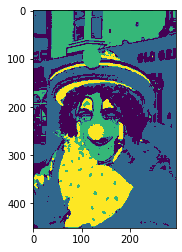

In [124]:
for i in images:
  image = Image.open(i)
  image_pixels = image.load()
  width, height = image.size
  values = np.array(image)
  pixel_values = values.reshape((-1, 3))
  pca = PCA(2)
  df = pca.fit_transform(pixel_values)
  k = 4
  member, means = k_means(df,k)
  cmap = matplotlib.cm.get_cmap('viridis', k)
  plt.imshow(member.reshape((height, width)), cmap=cmap)
  plt.show()

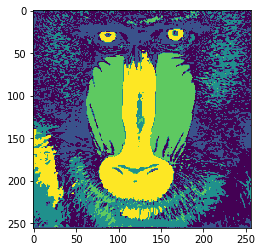

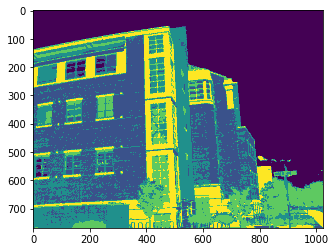

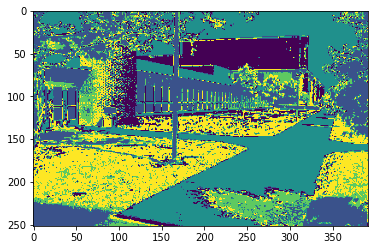

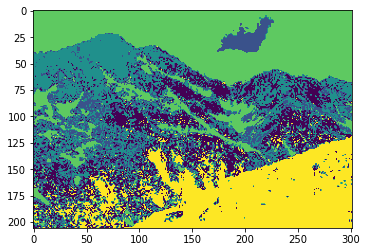

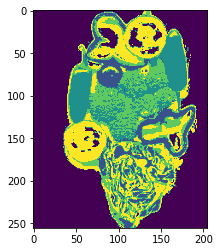

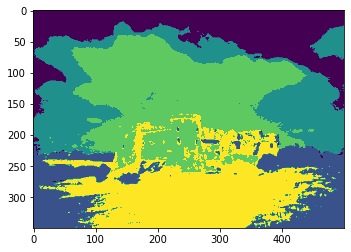

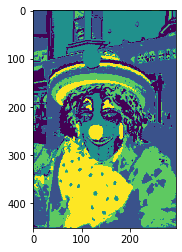

In [126]:
for i in images:
  image = Image.open(i)
  image_pixels = image.load()
  width, height = image.size
  values = np.array(image)
  pixel_values = values.reshape((-1, 3))
  pca = PCA(2)
  df = pca.fit_transform(pixel_values)
  k = 5
  member, means = k_means(df,k)
  cmap = matplotlib.cm.get_cmap('viridis', k)
  plt.imshow(member.reshape((height, width)), cmap=cmap)
  plt.show()

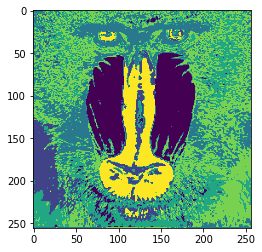

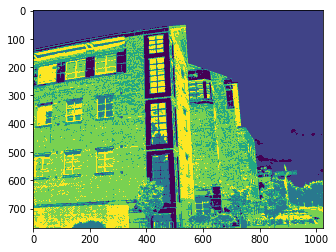

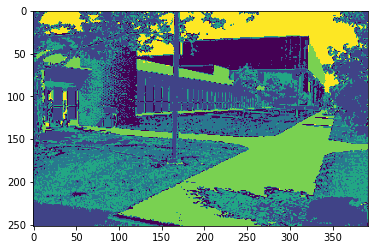

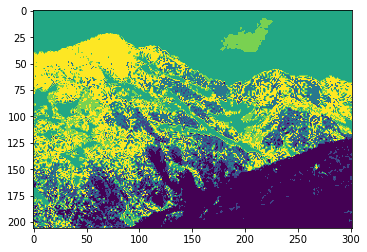

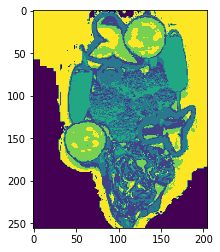

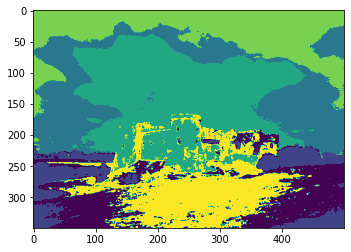

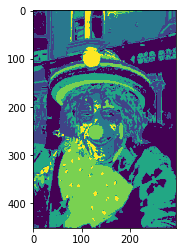

In [127]:
for i in images:
  image = Image.open(i)
  image_pixels = image.load()
  width, height = image.size
  values = np.array(image)
  pixel_values = values.reshape((-1, 3))
  pca = PCA(2)
  df = pca.fit_transform(pixel_values)
  k = 6
  member, means = k_means(df,k)
  cmap = matplotlib.cm.get_cmap('viridis', k)
  plt.imshow(member.reshape((height, width)), cmap=cmap)
  plt.show()

In [142]:
images[0].split('/')[-1]

'mandrill.jpg'

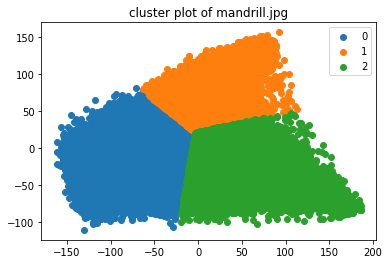

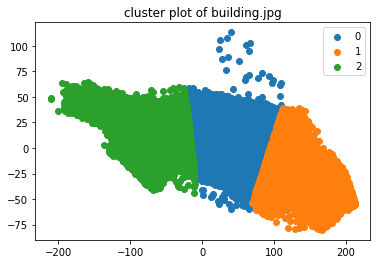

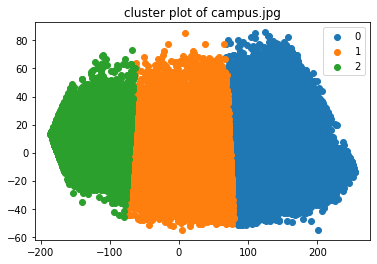

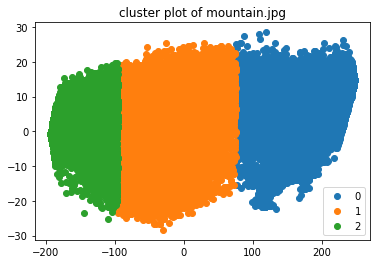

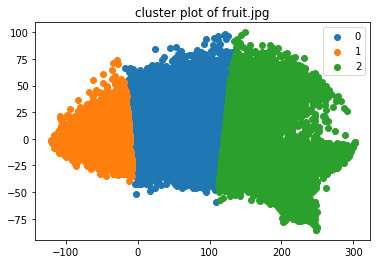

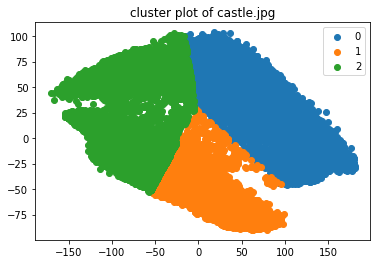

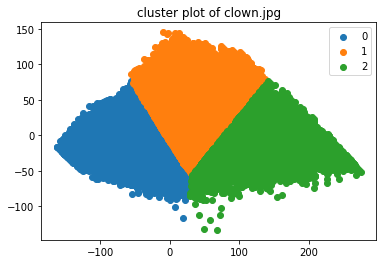

In [143]:
for j in images:
  image = Image.open(j)
  image_pixels = image.load()
  width, height = image.size
  values = np.array(image)
  pixel_values = values.reshape((-1, 3))
  pca = PCA(2)
  df = pca.fit_transform(pixel_values)
  k = 3
  member, means = k_means(df,k)

  labels = np.unique(member)
  for i in labels:
      plt.scatter(df[member == i , 0] , df[member == i , 1] , label = i)
  plt.title('cluster plot of '+ j.split('/')[-1])
  plt.legend()
  plt.show()